In [1]:
import os
print(os.getcwd())
print(os.listdir())

c:\Ai_Project
['.git', '.venv', 'calculator.py', 'calcultor_operations.py', 'dataset', 'diabetes.csv', 'EDA.ipynb', 'EDA.py', 'font', 'history.txt', 'human.txt', 'process.py', 'python1일차.ipynb', 'python2일차.ipynb', 'python3일차.ipynb', 'python4일차.ipynb', 'python4일차계산기.ipynb', 'python5일차.ipynb', 'python6일차.ipynb', 'python6일차Boston.ipynb', 'python공유문제.ipynb', 'python공유문제2.ipynb', 'report', 'student_data.py', 'watertot.csv', '__pycache__']


결측치 개수:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
데이터셋 크기: (506, 14)

처음 5개 행:
      CRIM    ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31   0.0  0.538  ...  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222     18.7  396.90    NaN  36.2

[5 rows x 14 columns]

기술통계:
             CRIM          ZN       INDUS  ...           B       LSTAT        MEDV
count  486.000000  486.000000  486.000000  ...  506.000000  486.000000  506.000000
mean     3.611874   11.211934   11.083992  ...  356.674032   12.715432   22.532806
std      8.72

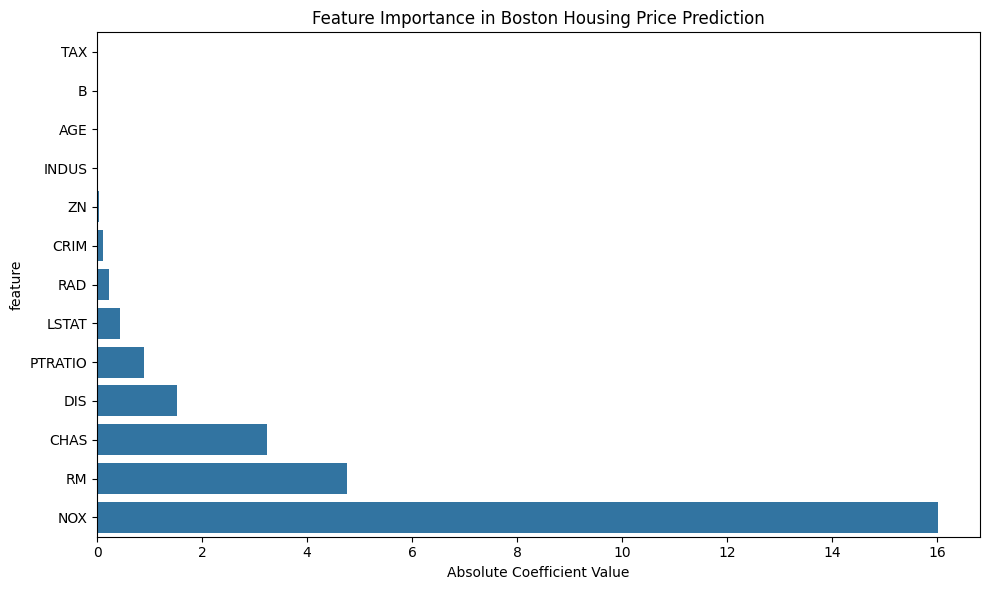

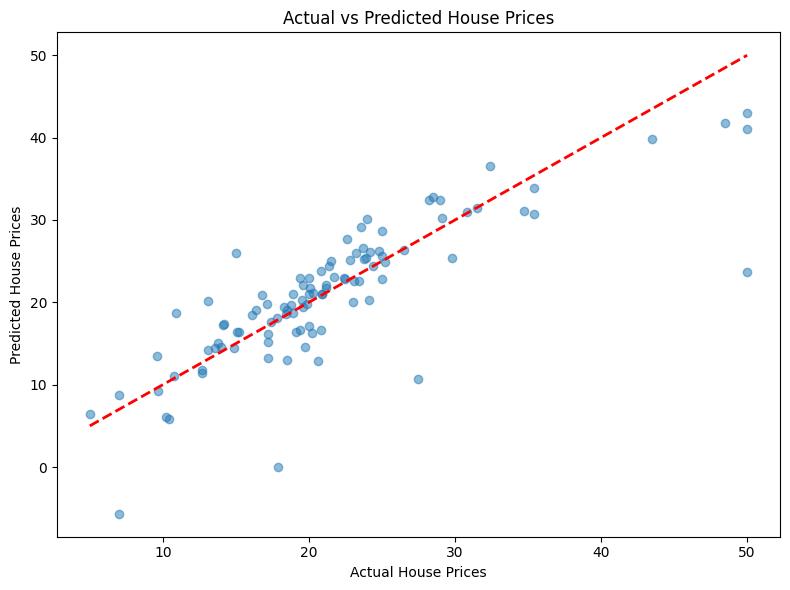

In [13]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer # 결측치 처리를 위해 추가
import matplotlib.pyplot as plt
import seaborn as sns
import random

df = pd.read_csv('dataset/HousingData.csv')

print("결측치 개수:")
print(df.isnull().sum())

print("데이터셋 크기:", df.shape)
print("\n처음 5개 행:")
print(df.head())
print('\n기술통계:')
print(df.describe())

imputer = SimpleImputer(strategy='mean') # 평균값으로 결측치 대체
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

X = df_imputed.drop('MEDV', axis=1) # df.drop 이 아닌 결측치가 처리 된 데이터를 사용
y=df_imputed['MEDV'] # df.drop 이 아닌 결측치가 처리 된 데이터를 사용

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('\n모델 성능:')
print("R2 점수:", r2_score(y_test, y_pred))
print("평균 제곱 오차 (MSE):", mean_squared_error(y_test, y_pred))
print("평균 절대 오차 (MAE):", mean_absolute_error(y_test, y_pred))

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(model.coef_)
})

feature_importance=feature_importance.sort_values('importance', ascending=True)

print('\n특성 중요도:')
print(feature_importance)

plt.figure(figsize=(10,6))
sns.barplot(x='importance',y='feature',data=feature_importance)
plt.title('Feature Importance in Boston Housing Price Prediction')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()
